<a href="https://colab.research.google.com/github/TaTaCo1/AnaliseRegressao./blob/main/Regress%C3%A3o_Linear_Estat%C3%ADstica_23_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Carregando os dados e as bibliotecas

In [ ]:
install.packages("ISLR")
install.packages("pander")
install.packages("ggplot2")
install.packages("ggpubr")
install.packages("lmtest")


library("ISLR")
library(pander)
library(lmtest)
library(ggplot2)
library(ggpubr)

setwd("./") # mudar diretório para pasta onde quer salvar os dados
write.table(Wage, file="nome_do_arquivo.csv", sep=";", dec=",") #criando arquivo .csv no local de interesse

help("Wage") #descrição das variáveis

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [ ]:
list.files()
dados <- read.csv("sample_data/california_housing_train.csv")
attach(dados)

[1] "nome_do_arquivo.csv" "sample_data"

In [ ]:
# Usar o california_housing_train.csv como base pra criar o modelo.

# Colunas
# ---------Variáveis Explicativas---------
# 1 longitude: Medida de quão ao oeste uma casa está, um valor mais alto indica um valor mais negativo está mais a oeste
# 2 latitude: medida de quão ao norte uma casa está; um valor mais alto está mais ao norte
# 3 housing_median_age: idade média das casas de um quarteirão.
# 4 total_rooms: quantos quartos em um unico quarteirão
# 5 total_bedrooms: quantos banheiros tem em um unico quarteirão
# 6 population: quantos moradores por quarteirão
# 7 households: quantos domicílios por quarteirão
# 8 median_income: renda média das familias vezes 10_000, valor é anual.

# ---------Variável Resposta---------
# 9 median_house_value: valor médio de uma casa em um quarteirão.

## Análise descritiva dos dados

In [ ]:
# dados de descrição de todas as variaveis contidas no modelo.
pander(summary(dados))



|   longitude    |   latitude    | housing_median_age |  total_rooms  |
|:--------------:|:-------------:|:------------------:|:-------------:|
| Min.   :-124.3 | Min.   :32.54 |   Min.   : 1.00    | Min.   :    2 |
| 1st Qu.:-121.8 | 1st Qu.:33.93 |   1st Qu.:18.00    | 1st Qu.: 1462 |
| Median :-118.5 | Median :34.25 |   Median :29.00    | Median : 2127 |
| Mean   :-119.6 | Mean   :35.63 |   Mean   :28.59    | Mean   : 2644 |
| 3rd Qu.:-118.0 | 3rd Qu.:37.72 |   3rd Qu.:37.00    | 3rd Qu.: 3151 |
| Max.   :-114.3 | Max.   :41.95 |   Max.   :52.00    | Max.   :37937 |

Table: Table continues below

 

| total_bedrooms |  population   |   households   |  median_income  |
|:--------------:|:-------------:|:--------------:|:---------------:|
| Min.   :   1.0 | Min.   :    3 | Min.   :   1.0 | Min.   : 0.4999 |
| 1st Qu.: 297.0 | 1st Qu.:  790 | 1st Qu.: 282.0 | 1st Qu.: 2.5664 |
| Median : 434.0 | Median : 1167 | Median : 409.0 | Median : 3.5446 |
| Mean   : 539.4 | Mean   : 1430 | Mea

In [ ]:
# matriz correlação
matriz_cor <- cor(dados)
matriz_cor

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.00000000,-0.92520828,-0.1142503,0.04701044,0.07180196,0.1016742646,0.059627704,-0.0154849614,-0.04498170
latitude,-0.92520828,1.00000000,0.0164539,-0.03877257,-0.06937292,-0.1112613615,-0.074902297,-0.0803030138,-0.14491672
housing_median_age,-0.11425031,0.01645390,1.0000000,-0.36098417,-0.32043408,-0.2958898054,-0.302754191,-0.1159316246,0.10675771
total_rooms,0.04701044,-0.03877257,-0.3609842,1.00000000,0.92840299,0.8601703408,0.919018298,0.1953828074,0.13099147
total_bedrooms,0.07180196,-0.06937292,-0.3204341,0.92840299,1.00000000,0.8811685744,0.980920092,-0.0134946823,0.04578305
population,0.10167426,-0.11126136,-0.2958898,0.86017034,0.88116857,1.0000000000,0.909246530,-0.0006376291,-0.02785006
households,0.05962770,-0.07490230,-0.3027542,0.91901830,0.98092009,0.9092465299,1.000000000,0.0076437162,0.06103063
median_income,-0.01548496,-0.08030301,-0.1159316,0.19538281,-0.01349468,-0.0006376291,0.007643716,1.0000000000,0.69187060
median_house_value,-0.04498170,-0.14491672,0.1067577,0.13099147,0.04578305,-0.0278500611,0.061030634,0.6918706038,1.00000000


## Gráficos

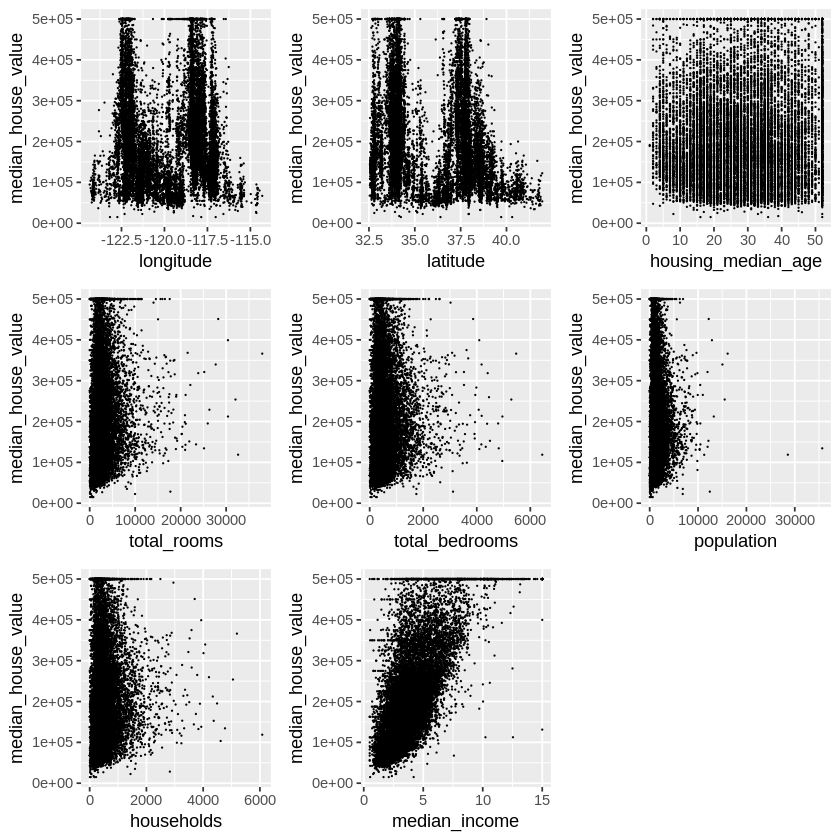

In [ ]:
scatterplot1 <- ggplot(data = dados, aes(x = longitude, y = median_house_value)) +
  geom_point(color = "black", size = 0) +
  labs(x = "longitude", y = "median_house_value")

scatterplot2 <- ggplot(data = dados, aes(x = latitude, y = median_house_value)) +
  geom_point(color = "black", size = 0) +
  labs(x = "latitude", y = "median_house_value")

scatterplot3 <- ggplot(data = dados, aes(x = housing_median_age, y = median_house_value)) +
  geom_point(color = "black", size = 0) +
  labs(x = "housing_median_age", y = "median_house_value")

scatterplot4 <- ggplot(data = dados, aes(x = total_rooms, y = median_house_value)) +
  geom_point(color = "black", size = 0) +
  labs(x = "total_rooms", y = "median_house_value")

scatterplot5 <- ggplot(data = dados, aes(x = total_bedrooms, y = median_house_value)) +
  geom_point(color = "black", size = 0) +
  labs(x = "total_bedrooms", y = "median_house_value")

scatterplot6 <- ggplot(data = dados, aes(x = population, y = median_house_value)) +
  geom_point(color = "black", size = 0) +
  labs(x = "population", y = "median_house_value")

scatterplot7 <- ggplot(data = dados, aes(x = households, y = median_house_value)) +
  geom_point(color = "black", size = 0) +
  labs(x = "households", y = "median_house_value")

scatterplot8 <- ggplot(data = dados, aes(x = median_income, y = median_house_value)) +
  geom_point(color = "black", size = 0) +
  labs(x = "median_income", y = "median_house_value")

panel <- ggarrange(scatterplot1, scatterplot2, scatterplot3, scatterplot4,
                   scatterplot5, scatterplot6, scatterplot7, scatterplot8,
                   nrow = 3, ncol = 3
                   )

panel

## Modelo 1 (inicial)
Todas as variáveis independentes

                      Df    Sum Sq   Mean Sq   F value  Pr(>F)    
longitude              1 4.627e+11 4.627e+11    95.853 < 2e-16 ***
latitude               1 5.526e+13 5.526e+13 11447.717 < 2e-16 ***
housing_median_age     1 4.814e+10 4.814e+10     9.972 0.00159 ** 
total_rooms            1 4.746e+12 4.746e+12   983.245 < 2e-16 ***
total_bedrooms         1 1.194e+13 1.194e+13  2472.753 < 2e-16 ***
population             1 1.491e+13 1.491e+13  3089.523 < 2e-16 ***
households             1 8.610e+11 8.610e+11   178.369 < 2e-16 ***
median_income          1 5.843e+13 5.843e+13 12104.842 < 2e-16 ***
Residuals          16991 8.202e+13 4.827e+09                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Call:
lm(formula = median_house_value ~ longitude + latitude + housing_median_age + 
    total_rooms + total_bedrooms + population + households + 
    median_income)

Residuals:
    Min      1Q  Median      3Q     Max 
-565474  -43649  -11525   30220  801097 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -3.621e+06  6.921e+04 -52.312  < 2e-16 ***
longitude          -4.314e+04  7.896e+02 -54.637  < 2e-16 ***
latitude           -4.293e+04  7.458e+02 -57.556  < 2e-16 ***
housing_median_age  1.151e+03  4.758e+01  24.186  < 2e-16 ***
total_rooms        -8.378e+00  8.628e-01  -9.711  < 2e-16 ***
total_bedrooms      1.176e+02  7.687e+00  15.305  < 2e-16 ***
population         -3.849e+01  1.186e+00 -32.456  < 2e-16 ***
households          4.544e+01  8.445e+00   5.380 7.54e-08 ***
median_income       4.051e+04  3.682e+02 110.022  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 69480 on 16

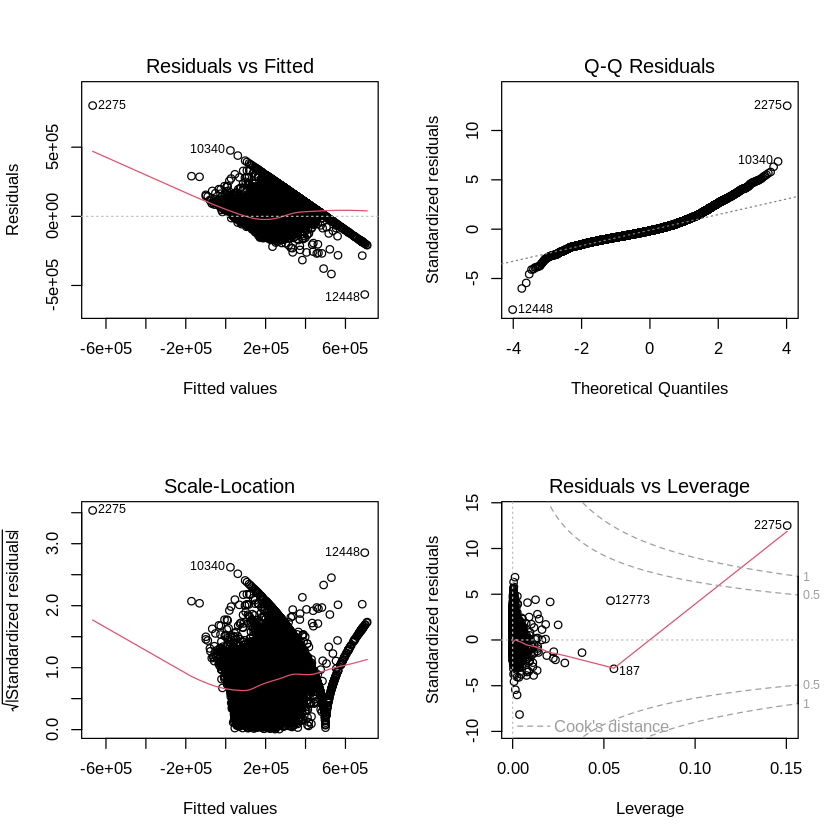

In [ ]:
# Modelo inicial
mod1 <- lm(median_house_value ~ longitude + latitude + housing_median_age + total_rooms + total_bedrooms + population + households + median_income )

# Analise de siginificância das variáveis explicativas, e resíduos
summary.aov(mod1)

# Analise dos coeficientes das variáveis. Valor de B(j), R, F
summary(mod1)

# Análise gráfica do modelo
par(mfrow=c(2,2))
plot(mod1)

### Testes

In [ ]:
# Teste para Homocedasticidade
bptest(mod1)

# Teste para a normalidade dos resíduos
ks.test(residuals(mod1), "pnorm")

# Teste para os Outliers nos resídulos
summary(rstandard(mod1))


	studentized Breusch-Pagan test

data:  mod1
BP = 681.18, df = 8, p-value < 2.2e-16



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  residuals(mod1)
D = 0.58259, p-value < 2.2e-16
alternative hypothesis: two-sided


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-8.154350 -0.628324 -0.165902  0.000052  0.435011 12.509796 

## Modelo 2
Somente: median_income x median_house_value



                 Df    Sum Sq   Mean Sq F value Pr(>F)    
median_income     1 1.095e+14 1.095e+14   15608 <2e-16 ***
Residuals     16998 1.192e+14 7.013e+09                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Call:
lm(formula = median_house_value ~ median_income, data = dados)

Residuals:
    Min      1Q  Median      3Q     Max 
-543496  -55851  -17276   36878  434998 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    43980.6     1456.5    30.2   <2e-16 ***
median_income  42054.1      336.6   124.9   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 83750 on 16998 degrees of freedom
Multiple R-squared:  0.4787,	Adjusted R-squared:  0.4787 
F-statistic: 1.561e+04 on 1 and 16998 DF,  p-value: < 2.2e-16


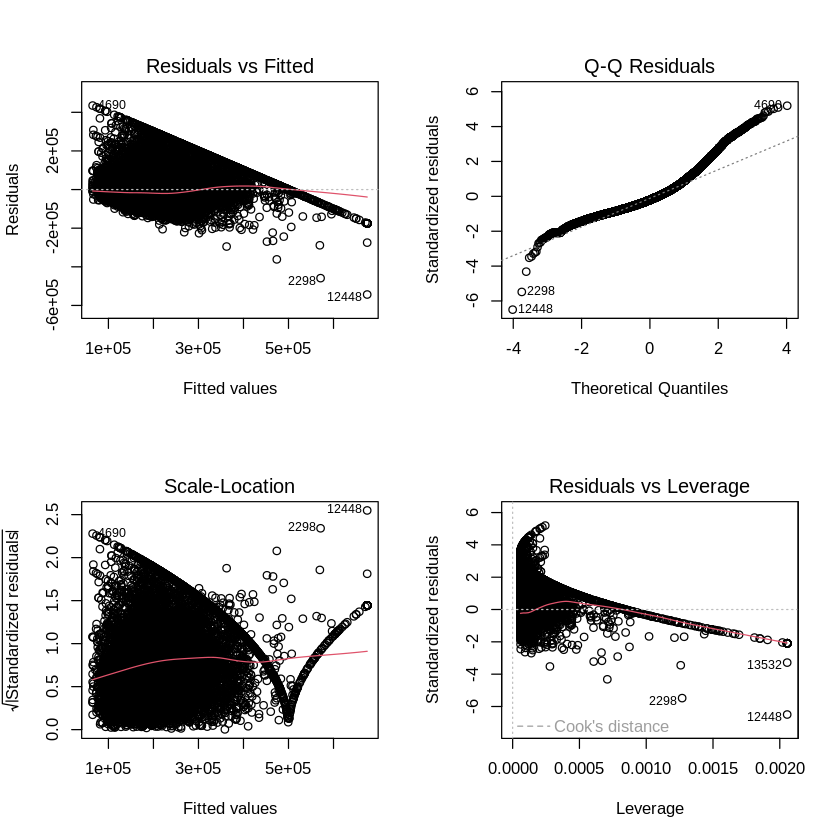

In [ ]:
# modelo de teste 2
mod2 <- lm(median_house_value ~ median_income, data = dados)
summary.aov(mod2)
summary(mod2)

# plota os gráficos.
par(mfrow=c(2,2))
plot(mod2)


In [ ]:
# teste de Kolmogorov-Smirnov para verificar se os residuos seguem modelo  de distribuição normal, se p-value é maior do 0,05 não rejeita a h0,
# se p-value é menor do que 0,05 , rejeita h0.
# ho: segue distribuição normal.
# h1: segue outra distribuição.
residuos <- resid(mod2)
resultado_teste <- ks.test(residuos, "pnorm")
resultado_teste

# calcula e fornecer um resumo dos valores dos resíduos
summary(rstandard(mod2))

Warning message in ks.test.default(residuos, "pnorm"):
“ties should not be present for the one-sample Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  residuos
D = 0.59624, p-value < 2.2e-16
alternative hypothesis: two-sided


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-6.496553 -0.666943 -0.206302 -0.000006  0.440378  5.194929 

## Modelo 3
Variáveis Mantidas: housing_median_age, total_rooms, total_bedrooms, median_income

                      Df    Sum Sq   Mean Sq F value Pr(>F)    
housing_median_age     1 2.604e+12 2.604e+12   432.5 <2e-16 ***
total_rooms            1 7.634e+12 7.634e+12  1267.8 <2e-16 ***
total_bedrooms         1 1.019e+13 1.019e+13  1692.1 <2e-16 ***
median_income          1 1.059e+14 1.059e+14 17590.0 <2e-16 ***
Residuals          16994 1.023e+14 6.021e+09                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Call:
lm(formula = median_house_value ~ housing_median_age + total_rooms + 
    total_bedrooms + median_income, data = sem_outlier)

Residuals:
    Min      1Q  Median      3Q     Max 
-658891  -49791  -13996   34584  476859 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -5.912e+04  2.482e+03  -23.82   <2e-16 ***
housing_median_age  1.937e+03  5.078e+01   38.14   <2e-16 ***
total_rooms        -2.659e+01  8.949e-01  -29.71   <2e-16 ***
total_bedrooms      1.619e+02  4.498e+00   36.00   <2e-16 ***
median_income       4.995e+04  3.766e+02  132.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 77600 on 16994 degrees of freedom
Multiple R-squared:  0.5525,	Adjusted R-squared:  0.5524 
F-statistic:  5246 on 4 and 16994 DF,  p-value: < 2.2e-16


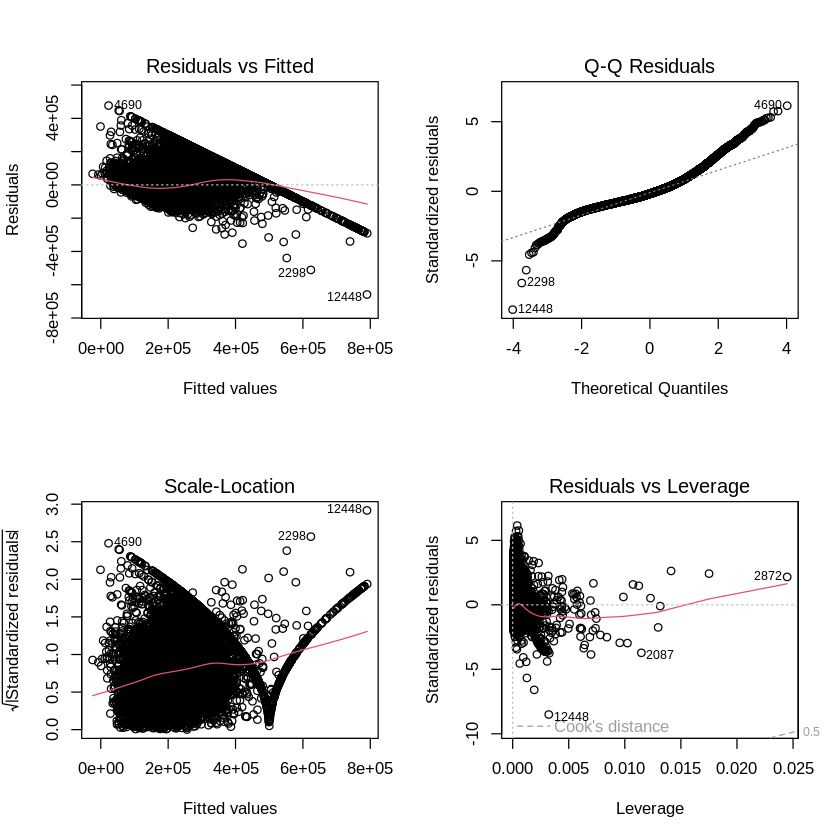

In [ ]:
sem_outlier <- dados[-2275,-12773,-187]

mod3 <- lm(median_house_value ~ housing_median_age + total_rooms + total_bedrooms + median_income, data = sem_outlier)
summary.aov(mod3)
summary(mod3)

par(mfrow=c(2,2))
plot(mod3)

In [ ]:
fitted(mod3)

1           2           3           4           5           6 
103107.5757 173058.1794  65301.9340 142089.0372  89905.0192 165412.4094 
          7           8           9          10          11          12 
155840.6439 111234.1033 178493.5666 149641.8591 135976.5804  88084.8784 
         13          14          15          16          17          18 
147430.1701 170620.0995  35529.2839  85780.2679 150759.9028  28536.1757 
         19          20          21          22          23          24 
 59596.6600  38327.3671  80166.5451  50325.2139  66861.8590 134024.8469 
         25          26          27          28          29          30 
 75844.5557 195985.5043 187034.2421  74572.1357 102018.0347 112125.3491 
         31          32          33          34          35          36 
127575.9830 112211.5815 285886.8532 142215.3739  64582.4663 172358.7241 
         37          38          39          40          41          42 
 82339.2612 118619.8745 103497.8323 147884.4370  79545.6196  84307.5731 
         43          44          45          46          47          48 
 89039.5083 139308.7301 106636.2408 139713.8070 117189.7852  94575.2076 
         49          50          51          52          53          54 
 84162.3605 115732.4508  73247.2856 100128.5640 115496.1517  94622.8401 
         55          56          57          58          59          60 
102293.9129  72418.3097  96693.1173 104438.1194  75062.5774 101720.0920 
         61          62          63          64          65          66 
109140.3272 141835.6252 111683.1951  66690.8604  83823.0161 189486.9247 
         67          68          69          70          71          72 
114137.2134 179536.1275  68857.7881 275133.1856 167800.8362 145152.4786 
         73          74          75          76          77          78 
 96288.2645  76194.2102  55055.1662 118179.4427 192447.1235  97879.6133 
         79          80          81          82          83          84 
124957.9488  61255.5128 110251.7367  82151.5496 195427.5044 240415.0511 
         85          86          87          88          89          90 
159015.7433 194977.6383 173883.8472  74605.9785 111257.9602 184235.3583 
         91          92          93          94          95          96 
101207.8905 189816.9480 290152.5085 192438.0031 155329.3938 175846.7319 
         97          98          99         100         101         102 
146998.3691  88340.0201 240229.8420 224744.5599 266806.0093 131504.2413 
        103         104         105         106         107         108 
146406.0363 160976.3537 104055.5231  86599.9110 149010.8292  98071.6835 
        109         110         111         112         113         114 
 83232.7114  84853.1806  76408.4705 142690.4572 136970.0269 211720.8144 
        115         116         117         118         119         120 
 98490.9507 175245.3478 173176.1727  74865.3642  19164.4596 154639.8371 
        121         122         123         124         125         126 
 87446.4124  60231.3288  53921.0042  30807.2937 105466.7791  37715.0721 
        127         128         129         130         131         132 
 78048.0469 149777.9331 153226.7452 171845.4890 136295.8078  67689.6894 
        133         134         135         136         137         138 
 78839.6863 183754.8320  97279.6043 168803.4406 107348.8872 124850.6956 
        139         140         141         142         143         144 
207699.5382 152402.5785 133279.4088  78269.6105  89559.0138 138426.0934 
        145         146         147         148         149         150 
 95807.1626 109758.8944  93145.8937 129022.8441  85926.9481 143500.0626 
        151         152         153         154         155         156 
123883.1950  91759.1201 144025.2478 160319.8822 107667.4221  98670.3519 
        157         158         159         160         161         162 
177056.3314  51324.5534 140280.9211 186017.9453 132395.5467 100703.6702 
        163         164         165         166         167         

In [ ]:
# teste de Kolmogorov-Smirnov para verificar se os residuos seguem modelo  de distribuição normal, se p-value é maior do 0,05 não rejeita a h0,
# se p-value é menor do que 0,05 , rejeita h0.
# ho: segue distribuição normal.
# h1: segue outra distribuição.
residuos <- resid(mod3)
resultado_teste <- ks.test(residuos, "pnorm")
resultado_teste

# calcula e fornecer um resumo dos valores dos resíduos
summary(rstandard(mod3))


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  residuos
D = 0.58598, p-value < 2.2e-16
alternative hypothesis: two-sided


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-8.504858 -0.641712 -0.180376 -0.000015  0.445729  6.146550 

## Treino e teste do modelo final

In [ ]:
install.packages("ggplot2")
install.packages("dplyr")

install.packages("caTools")    # For Linear regression
library(caTools)

library(ggplot2)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
# Load the data
data <- read.csv("sample_data/california_housing_train.csv")

# Split the data into training and testing sets
library(caTools)
set.seed(123) # for reproducibility
split <- sample.split(data$median_house_value, SplitRatio = 0.8)

train <- subset(data, split == TRUE)
test <- subset(data, split == FALSE)

In [ ]:
# Check the dimensions of the training and testing sets
print(dim(train))
print(dim(test))

[1] 13765     9
[1] 3235    9


Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


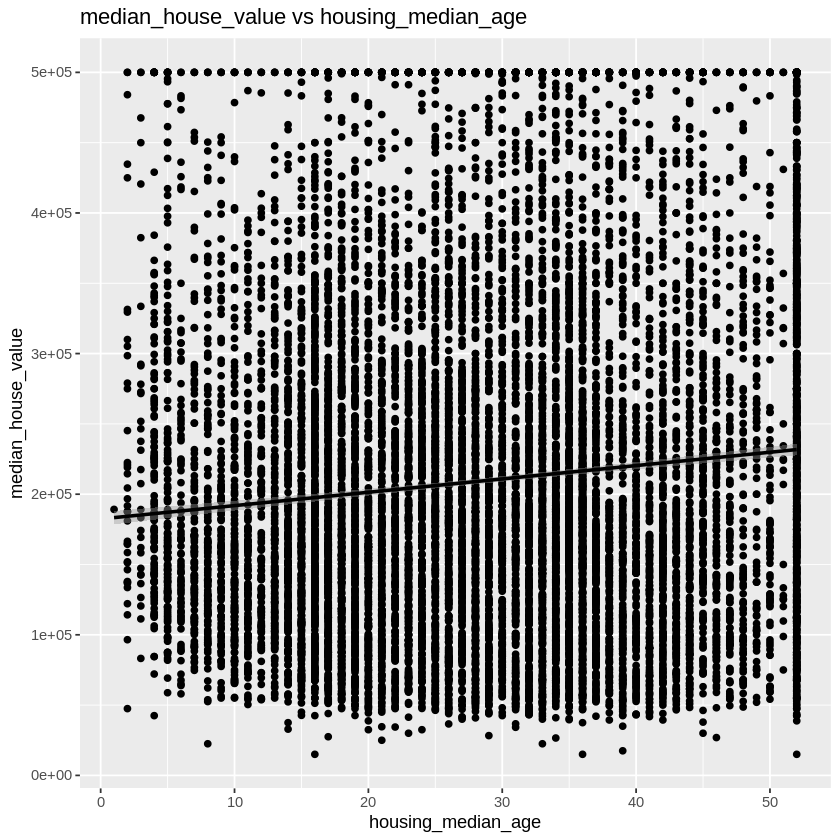

`geom_smooth()` using formula = 'y ~ x'


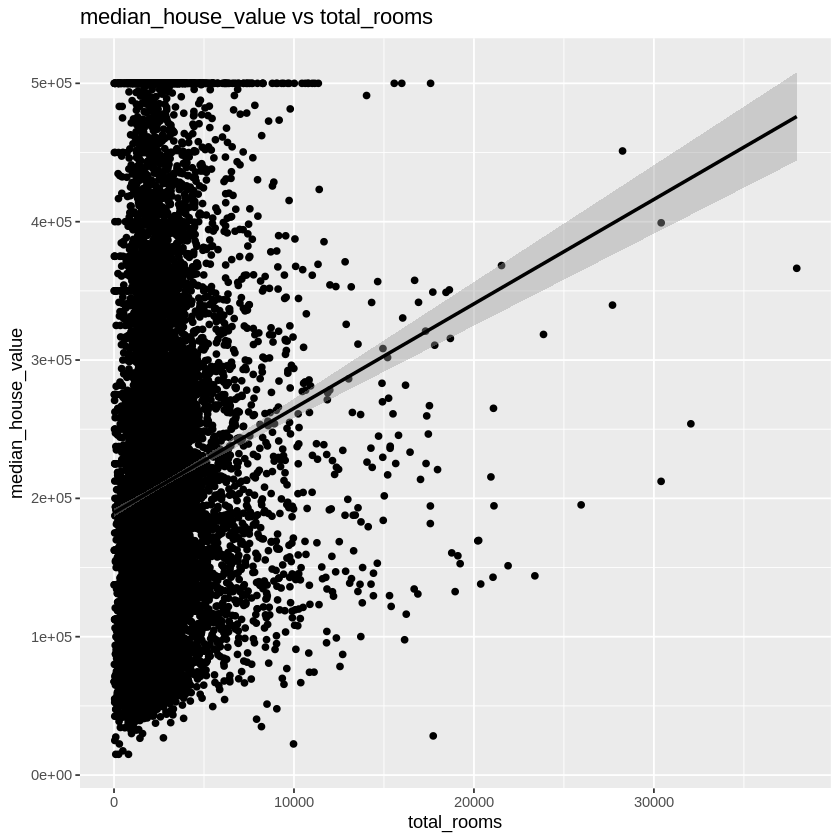

`geom_smooth()` using formula = 'y ~ x'


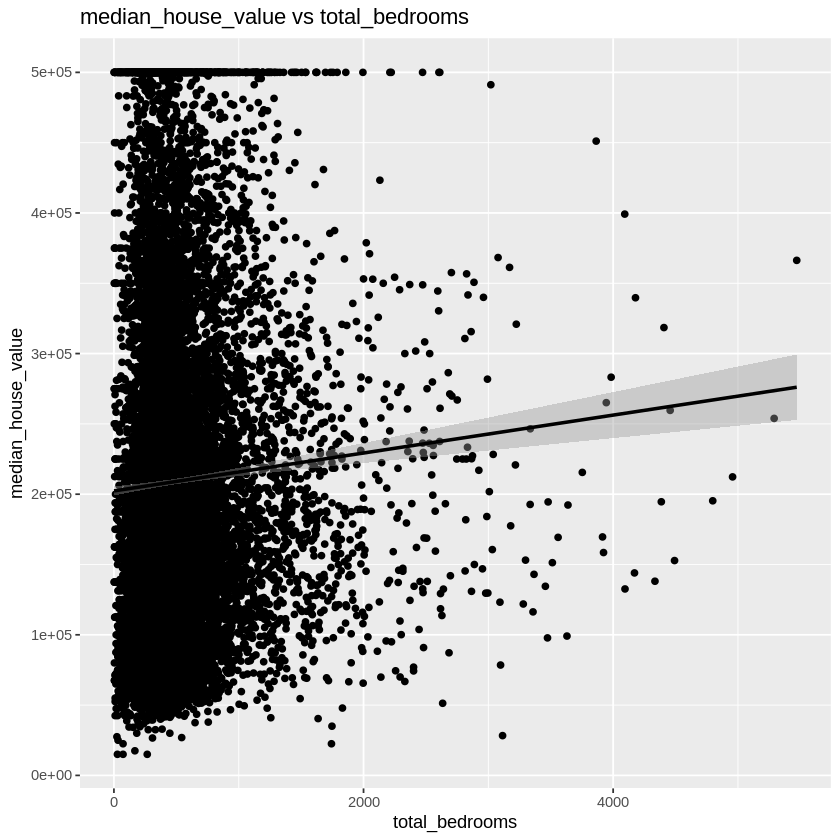

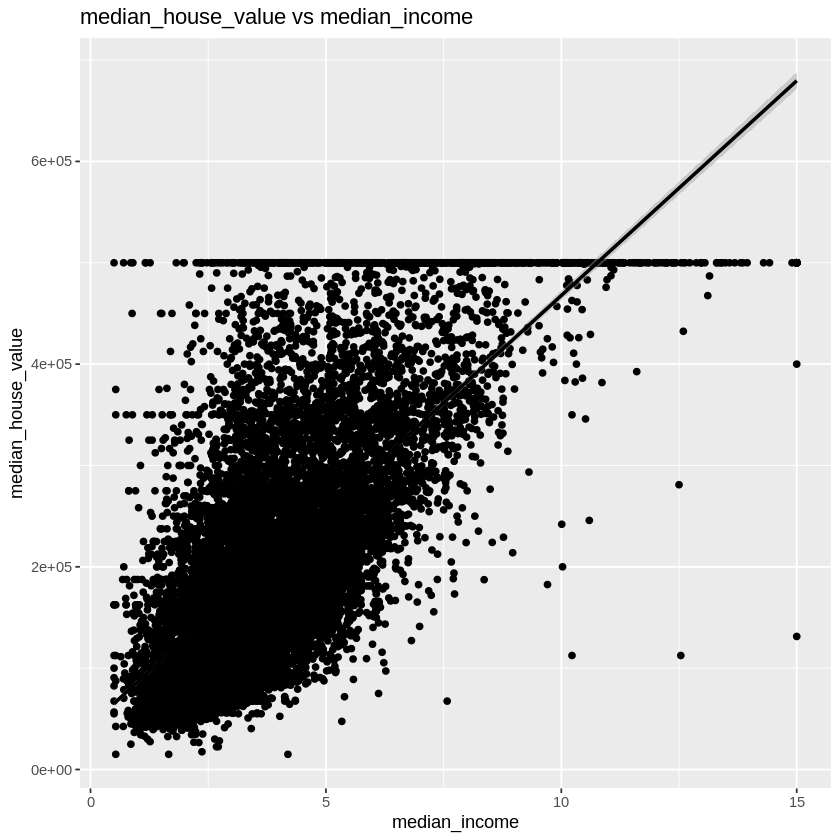

In [ ]:
# Treinar o modelo no conjunto de treinamento
sem_outlier <- data[-2275,-12773,-187]

model_all <- lm(median_house_value ~ housing_median_age + total_rooms + total_bedrooms + median_income, data = sem_outlier)

# Create a plot for each predictor
predictors <- c("housing_median_age", "total_rooms", "total_bedrooms", "median_income")

for(predictor in predictors){
  data.graph <- ggplot(train, aes_string(x=predictor, y="median_house_value")) +
    geom_point() +
    geom_smooth(method="lm", col="black") +
    labs(title=paste("median_house_value vs", predictor), x=predictor, y="median_house_value")
  print(data.graph)
}

In [ ]:
# Make predictions on the testing data
pred <- predict(model_all, newdata=test)

In [ ]:
# Calcular o RMSE (Root Mean Squared Error)
rmse_val <- sqrt(mean((pred - test$median_house_value)^2))
print(paste("RMSE: ", rmse_val))

[1] "RMSE:  74146.4487040004"


In [ ]:
# Calcular o MAE (Mean Absolute Error)
mae_val <- mean(abs(pred - test$median_house_value))
print(paste("MAE: ", mae_val))

[1] "MAE:  55058.3917747575"


In [ ]:
# Calcular o R-squared
SSE = sum((pred - test$median_house_value)^2)
SST = sum((test$median_house_value - mean(train$median_house_value))^2)
r2_test = 1 - SSE/SST
print(paste("R-squared: ", r2_test))

[1] "R-squared:  0.546189047661335"


In [ ]:
# Calcular o Adjusted R-squared
n = length(test$median_house_value)  # número de observações
p = length(coefficients(model_all)) - 1  # número de preditores
adj_r2_test = 1 - (1 - r2_test) * ((n - 1) / (n - p - 1))
print(paste("Adjusted R-squared: ", adj_r2_test))

[1] "Adjusted R-squared:  0.545627052673919"


## Avaliação dos modelos

In [ ]:
dataset_name = "sample_data/california_housing_train.csv"
variavel_resposta = "median_house_value"

In [ ]:
train_test_model <- function(model_name, dataset, variavel_resposta, preditoras = NULL, split_ratio) {
  # Load the data
  data <- read.csv(dataset)

  # Split the data into training and testing sets
  library(caTools)
  set.seed(123) # for reproducibility
  split <- sample.split(data[[variavel_resposta]], SplitRatio = split_ratio)

  train <- subset(data, split == TRUE)
  test <- subset(data, split == FALSE)

  # Train the model on the training set
  model_all <- lm(as.formula(paste(variavel_resposta, "~", paste(preditoras, collapse = " + "))), data = train)

  # Make predictions on the testing data
  pred <- predict(model_all, newdata = test)

  # Calculate RMSE (Root Mean Squared Error)
  rmse_val <- sqrt(mean((pred - test[[variavel_resposta]])^2))

  # Calculate MAE (Mean Absolute Error)
  mae_val <- mean(abs(pred - test[[variavel_resposta]]))

  # Calculate R-squared
  SSE <- sum((pred - test[[variavel_resposta]])^2)
  SST <- sum((test[[variavel_resposta]] - mean(train[[variavel_resposta]]))^2)
  r2_test <- 1 - SSE / SST

  # Create a data frame with the results
  result_table <- data.frame(
    Model = model_name,
    RMSE = rmse_val,
    MAE = mae_val,
    R_squared = r2_test
  )

  # Return the result table
  return(result_table)
}

Modelo 1 (inicial)

In [ ]:
variaveis_preditoras = c('longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income')
model_name = "modelo inicial"

model1_metrics <- train_test_model(model_name, dataset_name, variavel_resposta, preditoras = variaveis_preditoras, 0.8)

Modelo 2 (median_income)

In [ ]:
variaveis_preditoras = c("median_income")
model_name = "modelo 2"

model2_metrics <- train_test_model(model_name, dataset_name, variavel_resposta, preditoras = variaveis_preditoras, 0.8)

Modelo 3 (median_income, housing_median_age, total_rooms, total_bedrooms)

In [ ]:
variaveis_preditoras = c("housing_median_age", "total_rooms", "total_bedrooms", "median_income")
model_name = "modelo 3"

model3_metrics <- train_test_model(model_name, dataset_name, variavel_resposta, preditoras = variaveis_preditoras, 0.8)

In [ ]:
# Combine the metrics from all models into a single data frame
combined_metrics <- rbind(model1_metrics, model2_metrics, model3_metrics)
combined_metrics

Model,RMSE,MAE,R_squared
<chr>,<dbl>,<dbl>,<dbl>
modelo inicial,69230.10,49682.93,0.6043746
modelo 2,80804.96,61109.81,0.4610229
modelo 3,74289.45,55306.10,0.5444369


In [ ]:
write.csv(combined_metrics, file = "combined_metrics.csv", row.names = FALSE)